In [1]:
### Project 2 SQLAlchemy Database Yeast_Gene expression 

In [2]:
#!/usr/bin/env python
from sqlalchemy import create_engine
from sqlalchemy import MetaData
from sqlalchemy import Table, Column
from sqlalchemy import Integer, String
from sqlalchemy import sql, select, join, desc
import pandas as pd
import sqlite3

#Importing the database and establishing a connection
yeast_engine = create_engine('sqlite:////blue/bsc4452/admontalvo/yeast.sqlite')
conn=yeast_engine.connect()

#creating a dataframe with pandas combining
#gene_id,location_id,function_id, and bioprocess_id to create a unique gene ID
#Odd primary key 
#Join statement linking all the tables together
df_yeast=pd.read_sql_query('''SELECT Expression.transcripts, Genes.name, Description.meaning,Molecular.function,Treatment.condition,locations.location,Bioprocess.process
                  FROM Expression JOIN Genes JOIN Description JOIN Molecular JOIN Treatment JOIN locations JOIN Bioprocess
                ON Expression.gene_id=Genes.id AND Expression.meaning_id=Description.id AND Expression.treatment_id=Treatment.id
                AND Expression.function_id=Molecular.id AND Expression.location_id=locations.id AND Expression.bioprocess_id=Bioprocess.id''', conn)


df_yeast.head(10) #Prints the first 10 rows

,transcripts,name,meaning,function,condition,location,process
0,7.379174,YGR131W,E1B1 ethanol,molecular_function,IFFABF,membrane,protein ion
1,5.858715,YGR131W,pbs2 galactose,molecular_function,SAASCC,membrane,protein ion
2,12.130323,YGR131W,G2A1 glucose,molecular_function,IFFAFF,membrane,protein ion
3,12.679748,YGR131W,G1A1 glucose,molecular_function,IFFAFA,membrane,protein ion
4,11.276427,YGR131W,YB210 biofuel generation,molecular_function,INICIA,membrane,protein ion
5,18.484635,YGR131W,YB211 biofuel generation,molecular_function,INICIF,membrane,protein ion
6,2.377259,YGR131W,30 deg temperature,molecular_function,SAABQI,membrane,protein ion
7,22.251591,YGR131W,Strain6 phenol lysis,molecular_function,FFNAAA,membrane,protein ion
8,4.405163,YGR131W,DDY3630 strain W303,molecular_function,IFAAAR,membrane,protein ion
9,0.467589,YGR131W,itc1 itc1-1_dUTP,molecular_function,AFIINC,membrane,protein ion


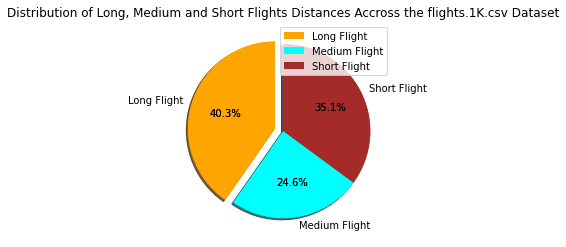

In [3]:
#plotting LifeExpectancy Vs other values using matplotlib
import numpy as np
import matplotlib.pyplot as plt

#Customizing the pie long, medium and short chart and playing around with the functions
labels = 'Long Flight', 'Medium Flight', 'Short Flight'
sizes = [403, 246, 351]
 
colors = ( "orange", "cyan", "brown") 
fig1, ax1 = plt.subplots()
explode = (0.1, 0, 0) #Can change the value to make the slice of the pie farther or closer 
#in this case the long flights are extended 

#Customizing the pie chart explode makes a slice pop out startangle rotates it
ax1.pie(sizes, colors = colors, explode=explode, labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)
patches, texts, auto = ax1.pie(sizes, colors=colors, shadow=True, startangle=90,explode=explode, autopct='%1.1f%%' )

plt.title('Distribution of Long, Medium and Short Flights Distances Accross the flights.1K.csv Dataset') 
plt.legend(patches, labels, loc="best") #legend is poorly placed but I mostly wanted to work with the code
#the legend can be moved with upper left, lower right, upper right, designitions but all of them look worse
plt.show()


In [4]:
#obtaining the names of all the tables with the engine connection
yeast_engine.table_names()

['Bioprocess',
 'Description',
 'Expression',
 'Genes',
 'Member',
 'Molecular',
 'Relation',
 'Treatment',
 'locations',
 'sqlite_sequence']

In [5]:
#obtaining table descriptions from database, similiar to .schema command function with SQLite3 in the terminal
from sqlalchemy import create_engine, inspect


inspector = inspect(yeast_engine)
table_names = inspector.get_table_names()
for table_name in table_names:
    print(f"Table:{table_name}")
    column_items = inspector.get_columns(table_name)
    print('\t'.join(n for n in column_items[0]))
    for c in column_items:
        assert len(c) == len(column_items[0])
        print('\t'.join(str(c[n]) for n in c))

Table:Bioprocess
name	type	nullable	default	autoincrement	primary_key
id	INTEGER	False	None	auto	1
process	TEXT	True	None	auto	0
Table:Description
name	type	nullable	default	autoincrement	primary_key
id	INTEGER	False	None	auto	1
meaning	TEXT	True	None	auto	0
Table:Expression
name	type	nullable	default	autoincrement	primary_key
gene_id	INTEGER	True	None	auto	0
transcripts	INTEGER	True	None	auto	0
treatment_id	INTEGER	True	None	auto	0
location_id	INTEGER	True	None	auto	0
meaning_id	INTEGER	True	None	auto	0
function_id	INTEGER	True	None	auto	0
bioprocess_id	INTEGER	True	None	auto	0
Table:Genes
name	type	nullable	default	autoincrement	primary_key
id	INTEGER	False	None	auto	1
name	TEXT	True	None	auto	0
Table:Member
name	type	nullable	default	autoincrement	primary_key
gene_id	INTEGER	True	None	auto	1
location_id	INTEGER	True	None	auto	2
function_id	INTEGER	True	None	auto	3
bioprocess_id	INTEGER	True	None	auto	4
Table:Molecular
name	type	nullable	default	autoincrement	primary_key
id	INTEGER	F

CompileError: Can't generate DDL for NullType(); did you forget to specify a type on this Column?

In [6]:
yeast_engine.execute("SELECT * FROM locations").fetchall()

[(1, 'membrane'),
 (2, 'mitochond'),
 (3, 'nucle'),
 (18, 'cytoplasm'),
 (22, 'cytosol'),
 (41, 'endoplasm'),
 (121, 'extracellular')]

In [12]:
#Sorting dataframe to obtain yeast strains in the different compartments with RNA-seq transcript values < 5 and FFNAAA growth treatment

df_yeast.sort_values("transcripts", inplace = True)
  
# Filtering transcripts < 5  rna seq reads from yeast database
transcripts_filter1 = df_yeast["transcripts"] < 5

# Filtering transcripts > 5  rna seq reads from yeast database
transcripts_filter2 = df_yeast["transcripts"] > 5

# Filtering values within the location column in the yeast database that contain the term membrane
location_mem = df_yeast["location"] == "membrane"

# Filtering values within the location column in the yeast database that contain the term "mitochond" which is short for mitochondria
location_mito = df_yeast["location"] == "mitochond"

# Filtering values within the location column in the yeast database that contain the term "nucle" which is short for nucleus
location_nucl = df_yeast["location"] == "nucle"

# Filtering values within the location column in the yeast database that contain the term "cytoplasm" 
location_cytoplasm = df_yeast["location"] == "cytoplasm"

# Filtering values within the location column in the yeast database that contain the term "cytosol" 
location_cytosol = df_yeast["location"] == "cytosol"

# Filtering values within the location column in the yeast database that contain the term "endoplasm" 
location_endoplasm = df_yeast["location"] == "endoplasm"

# Filtering values within the location column in the yeast database that contain the term "extracellular" 
location_extracellular = df_yeast["location"] == "extracellular"


#displaying the new dataframe with filtered data
df_yeast





,transcripts,name,meaning,function,condition,location,process
32619,0.000000,YCR040W,YB211 biofuel generation,transcription,INICIF,nucle,regulation ion
2939,0.000000,YJR158W,YB212 biofuel generation,transmembrane,INICIQ,membrane,transport
2940,0.000000,YJR158W,15 deg temperature,transmembrane,SAABFA,membrane,transport
2942,0.000000,YJR158W,wild type none,transmembrane,SAABRQ,membrane,transport
2943,0.000000,YJR158W,G1B2 glucose,transmembrane,IFFAFB,membrane,transport
...,...,...,...,...,...,...,...
26587,15920.480829,YGR192C,G1B2 glucose,NAD+,IFFAFB,cytoplasm,transport metabolic process
26568,16596.424116,YGR192C,G1A1 glucose,NAD+,IFFAFA,cytoplasm,transport metabolic process
26585,17877.324164,YGR192C,G2A2 glucose,NAD+,IFFAFQ,cytoplasm,transport metabolic process
3007,17898.923164,YBR020W,ste12 galactose,kinase,SAASCF,cytoplasm,positive regulation ion catabolic process


In [ ]:
# creating a function to count the number of reads and upload them based on compartment

count_mem = 0
count_mit = 0
count_nucl = 0
count_cytoplasm = 0
count_cytosol = 0
count_endoplasm = 0
count_extracellular = 0
count_transcripts_5 = 0 #count transcripts >5
count_transcript_4 = 0 #count transcripts <5
 

    
    
def membrane():
for count in membrane_count:
    if df_yeast["location"] == "membrane":
        count_mem = count_mem + 1
print(count_mem)
        

        

In [16]:
from sqlalchemy import func

df_yeast.readline()
def query_count(location_mem):
    counter = location_mem.statement.with_only_columns([func.count()])
    counter = counter.order_by(None)
    return location_mem.session.execute(counter).scalar()

query_count(location_mem)

AttributeError: 'DataFrame' object has no attribute 'readline'

In [20]:
from sqlalchemy.sql import func
membrane_count = yeast_engine.execute(select([func.count(Expression.c.location.label('membrane'))]))
print (membrane_count.fetchone())

NameError: name 'Expression' is not defined